<a href="https://www.kaggle.com/code/nouramedhat/masterpieces-image-preprocessing?scriptVersionId=109027046" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

> ## 1. About the notebook

- **The notebook has 3 of my favourite paintings that I'm about to perform some image preprocessing techniques on them.**
<hr/>

> ## 2. Importing the needed libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
import cv2
import matplotlib.pyplot as plt
%matplotlib inline



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/girl-with-a-pearl-earring/johannes_vermeer_girl_with_a_pearl_earring_oil_canvas_art_117721_4095x4794.jpg
/kaggle/input/the-passion-of-creation/The passion of creation.jpg
/kaggle/input/man-reading-a-letter/20220715_222832.jpg


<hr/>

<hr/>

> ## 3. Functions to be used

In [2]:
def load_img(paintingLink):
    img = cv2.imread(paintingLink)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

<hr/>

> ## 4. Image Preprocessing

### 4.1 Blurring & Smoothing

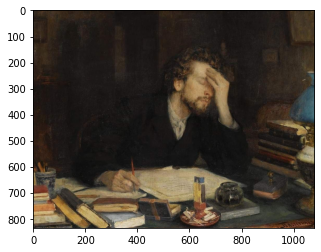

In [3]:
#the paining before any edit
img1 = load_img("../input/the-passion-of-creation/The passion of creation.jpg")
plt.imshow(img1)

#### 4.1.1 Averaging

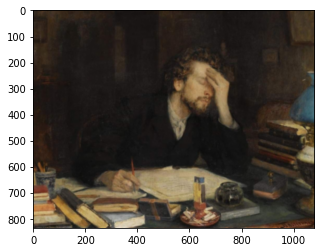

In [4]:
#kernel 5*5
avg_blur_img = cv2.blur(img1, ksize = (5,5))
plt.imshow(avg_blur_img)

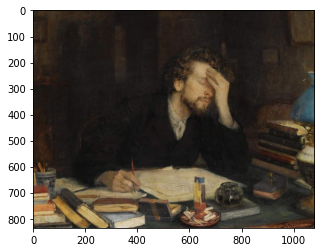

In [5]:
#kernel 2*2
avg_blur_img2 = cv2.blur(img1, ksize = (2,2))
plt.imshow(avg_blur_img2)

<hr/>

#### 4.1.2 Gaussian Blurring

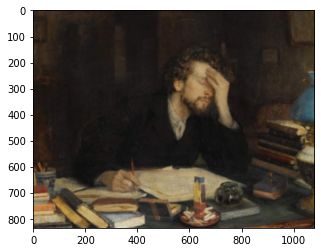

In [6]:
#kernel 5*5
Gauss_blur_img1 = cv2.GaussianBlur(img1, (5,5),10)
plt.imshow(Gauss_blur_img1)

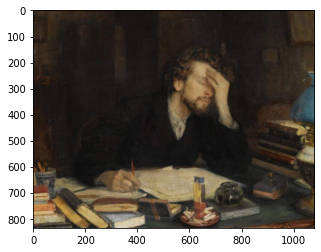

In [7]:
#kernel 3*3
Gauss_blur_img2 = cv2.GaussianBlur(img1, (3,3),2)
plt.imshow(Gauss_blur_img2)

<hr/>

#### 4.1.3 Median 

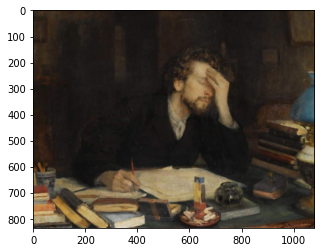

In [8]:
median_img = cv2.medianBlur(img1,5)
plt.imshow(median_img)

<hr/>

### 4.2 Color Mapping 

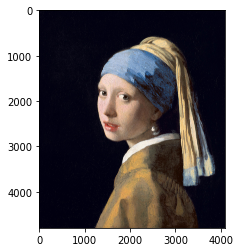

In [9]:
#the painting before editing
img2 = load_img("../input/girl-with-a-pearl-earring/johannes_vermeer_girl_with_a_pearl_earring_oil_canvas_art_117721_4095x4794.jpg")
plt.imshow(img2)

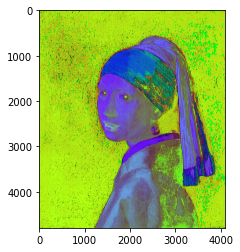

In [10]:
img_after = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
plt.imshow(img_after)

<hr/>

### 4.3 Edge Detection 

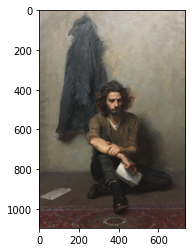

In [11]:
img3 = load_img("../input/man-reading-a-letter/20220715_222832.jpg")
plt.imshow(img3)

#### 4.3.1 First thresholds 

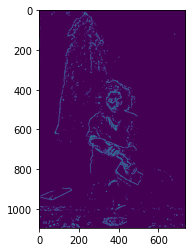

In [12]:
edges = cv2.Canny(image=img3, threshold1=127, threshold2=127)
plt.imshow(edges)

<hr/>

#### 4.3.2 Second thresholds 

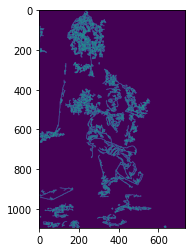

In [13]:
edges2 = cv2.Canny(image=img3, threshold1=0, threshold2=255)
plt.imshow(edges2)

- **Worse than the first one**
<hr/>

#### 4.3.3 Third thresholds

In [14]:
# Calculate the median pixel value
med_val = np.median(img3)

In [15]:
# Lower bound is either 0 or 70% of the median value, whicever is higher
lower = int(max(0, 0.7* med_val))

In [16]:
# Upper bound is either 255 or 30% above the median value, whichever is lower
upper = int(min(255,1.3 * med_val))

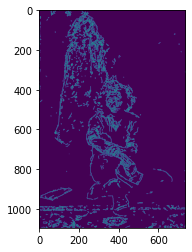

In [17]:
edges3 = cv2.Canny(image=img3, threshold1=lower , threshold2=upper)
plt.imshow(edges3)

- **Much bitter than the second one**
<hr/>

#### 4.3.4 Forth thresholds

In [18]:
avg2_blur_img = cv2.blur(img3, ksize = (5,5))

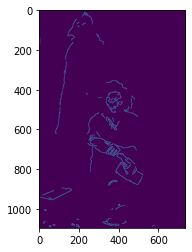

In [19]:
edges4 = cv2.Canny(image=avg2_blur_img, threshold1=lower , threshold2=upper)
plt.imshow(edges4)

- **Much better**
<hr/>

### 4.4 Grediants

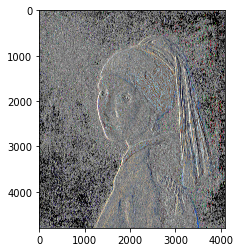

In [20]:
sobelx = cv2.Sobel(img2,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img2, cv2.CV_64F,0,1,ksize=5)
laplacian = cv2.Laplacian(img2, cv2.CV_64F)
plt.imshow(sobelx)

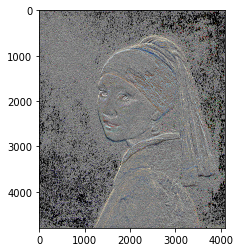

In [21]:
plt.imshow(sobely)

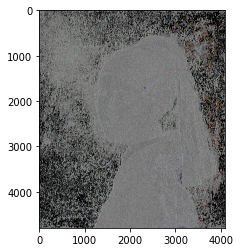

In [22]:
plt.imshow(laplacian)

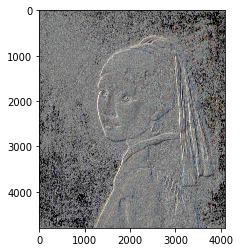

In [23]:
#combining the results
blended = cv2.addWeighted(src1=sobelx,alpha=0.5,src2=sobely,beta=0.5,gamma=0)
plt.imshow(blended)

<hr/>